## Wordclouds On Blogs

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [2]:
def generate_wordcloud(text, wordcloud_kwargs=None):
    wordcloud_kwargs = {} if wordcloud_kwargs is None else wordcloud_kwargs
    wordcloud = WordCloud(**wordcloud_kwargs)
    words = wordcloud.process_text(text)
    output = wordcloud.generate_from_frequencies(words)
    plt.figure(figsize=(20, 6))
    plt.imshow(output, interpolation='bilinear')
    plt.axis('off')
    return output

In [3]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['mathbf', 'begin', 'end', 'top', 'epsilon', 'PNG', 'img', 'src'])

url = 'http://localhost:9200'
es = Elasticsearch(url)

### Search `title` With "recommender"

In [4]:
output = []

s = Search()
s = s.query('term', title='recommender')

res = es.search(index='bangda_blog', body=s.to_dict(), size=50)
num_results = len(res['hits']['hits'])
print('Number of results:', num_results)

print('{:67s} | {:78s} | {}'.format('Title', 'Tags', 'Score'))
print('-' * 162)    
for result in res['hits']['hits']:
    print('{:67s} | {:78s} | {}'.format(result['_source']['title'], result['_source']['tags'], result['_score']))
    output.append(result['_source']['text'])

Number of results: 3
Title                                                               | Tags                                                                           | Score
------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matrix Factorization for Recommender Systems                        | [Recommender Sys, Machine Learning, Factorization Models]                      | 3.004182
Recommender Systems Overview - From A Survey                        | [Recommender Sys, Machine Learning]                                            | 2.8004267
Wide and Deep Learning for Recommender Systems                      | [Recommender Sys, Machine Learning, Deep Learning]                             | 2.6225545


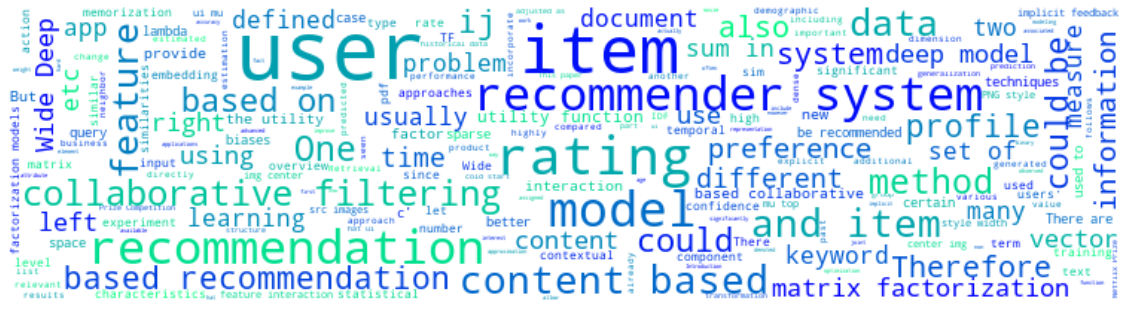

In [5]:
blog_text = '\n'.join(output)
wordcloud_kwargs = {
    'height': 200,
    'width': 750,
    'stopwords': STOPWORDS,
    'background_color': 'white',
    'colormap': plt.cm.winter,
    'max_font_size': 54
}
wordcloud = generate_wordcloud(blog_text, wordcloud_kwargs)

### Search `tags` with `machine learning`

In [6]:
output = []

s = Search()
q = Q('bool', must=[Q('term', tags='machine'), Q('term', tags='learning')])
s = s.query(q)

res = es.search(index='bangda_blog', body=s.to_dict(), size=50)
num_results = len(res['hits']['hits'])
print('Number of results:', num_results)

print('{:67s} | {:78s} | {}'.format('Title', 'Tags', 'Score'))
print('-' * 162)    
for result in res['hits']['hits']:
    print('{:67s} | {:78s} | {}'.format(result['_source']['title'], result['_source']['tags'], result['_score']))
    output.append(result['_source']['text'])

Number of results: 24
Title                                                               | Tags                                                                           | Score
------------------------------------------------------------------------------------------------------------------------------------------------------------------
Deep Learning Basis & Cheatsheet                                    | [Machine Learning, Deep Learning]                                              | 1.773541
First Journey through Kaggle                                        | [Machine Learning, Kaggle]                                                     | 1.6966699
My Kaggle Experiences Summary                                       | [Machine Learning, Kaggle]                                                     | 1.6966699
Stanford NLP (coursera) Notes (10) - Relation Extraction            | [NLP, Machine Learning]                                                        | 1.6966699
L1 Norm Regular

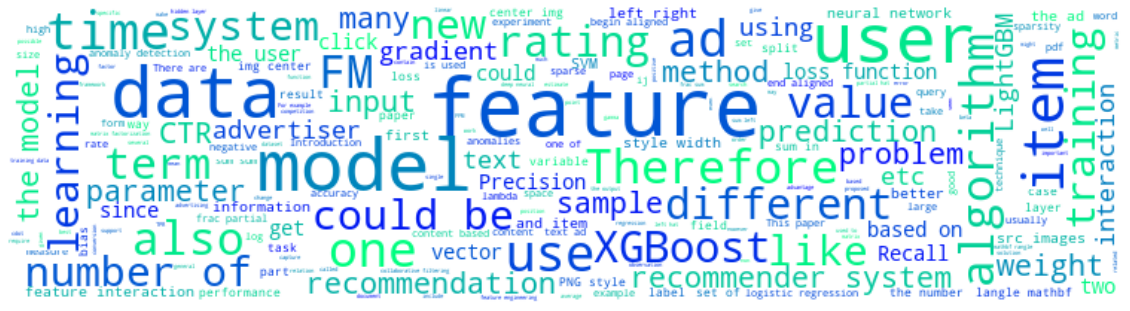

In [7]:
blog_text = '\n'.join(output)
wordcloud_kwargs = {
    'height': 200,
    'width': 750,
    'stopwords': STOPWORDS,
    'background_color': 'white',
    'colormap': plt.cm.winter,
    'max_font_size': 54
}
wordcloud = generate_wordcloud(blog_text, wordcloud_kwargs)